# New Section

In [ ]:
import os
import random
from shutil import copy
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path ke dataset di Google Drive
DATASET_DIR = '/content/drive/MyDrive/DATASET/ASIA'
categories = ['Down Syndrome', 'Healthy']

# Inisialisasi total gambar
total_images = 0

print("Renaming Results:")
print("=================")

for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = 0  # Counter untuk setiap kategori
        for idx, filename in enumerate(os.listdir(category_dir), start=1):
            old_path = os.path.join(category_dir, filename)
            if os.path.isfile(old_path):
                # Buat nama baru
                new_filename = f"{category.replace(' ', '_')}_{idx:03}.jpg"  # Ganti spasi dengan underscore
                new_path = os.path.join(category_dir, new_filename)
                os.rename(old_path, new_path)
                count += 1
                print(f"{filename} -> {new_filename}")
        print(f"\nJumlah gambar di kategori '{category}': {count}")
        total_images += count

print("\n=================")
print(f"Total gambar di dataset: {total_images}")


Renaming Results:
down_1010_jpg.rf.323af843c2078ee6e56bed36f8ba08a8.jpg -> Down_Syndrome_001.jpg
down_1008_jpg.rf.315e6e56a1f05562ee70703880c39b71.jpg -> Down_Syndrome_002.jpg
down_1005_jpg.rf.c17f750685ba5cfea73dc058a367edad.jpg -> Down_Syndrome_003.jpg
down_1009_jpg.rf.a9fdf45ab35209df6e85b17af19bb4da.jpg -> Down_Syndrome_004.jpg
down_1004_jpg.rf.49b05473862427c71a433d70574561e0.jpg -> Down_Syndrome_005.jpg
down_1007_jpg.rf.40bb1cba224172669a417fa349b95ac8.jpg -> Down_Syndrome_006.jpg
down_1018_jpg.rf.dc8da05bb734efa9f7d0e34c91f1ef6f.jpg -> Down_Syndrome_007.jpg
down_1017_jpg.rf.edce7e2746cf56b66c1e46b8ad267023.jpg -> Down_Syndrome_008.jpg
down_101_jpg.rf.24055da8950fd9910f5c68927d1746ed.jpg -> Down_Syndrome_009.jpg
down_1026_jpg.rf.afaa152a18054bf7008a70b4bcda7c24.jpg -> Down_Syndrome_010.jpg
down_1012_jpg.rf.32d0537b07941c9076657eb085bd1900.jpg -> Down_Syndrome_011.jpg
down_1013_jpg.rf.122a12d29b934582b4b44cb56ae9fd8d.jpg -> Down_Syndrome_012.jpg
down_1021_jpg.rf.ae69ae115e093b19ef

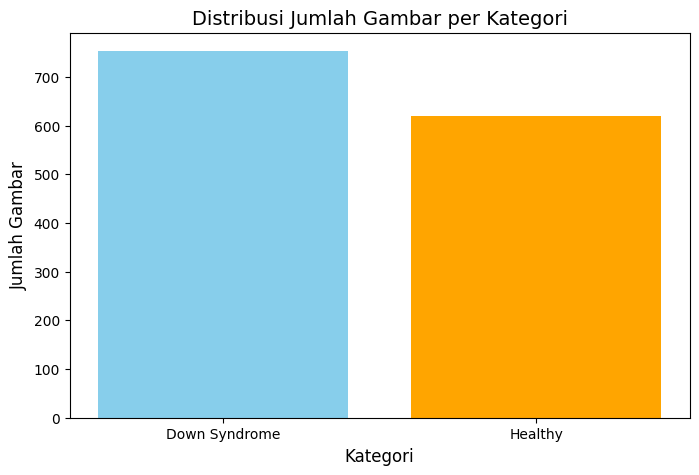

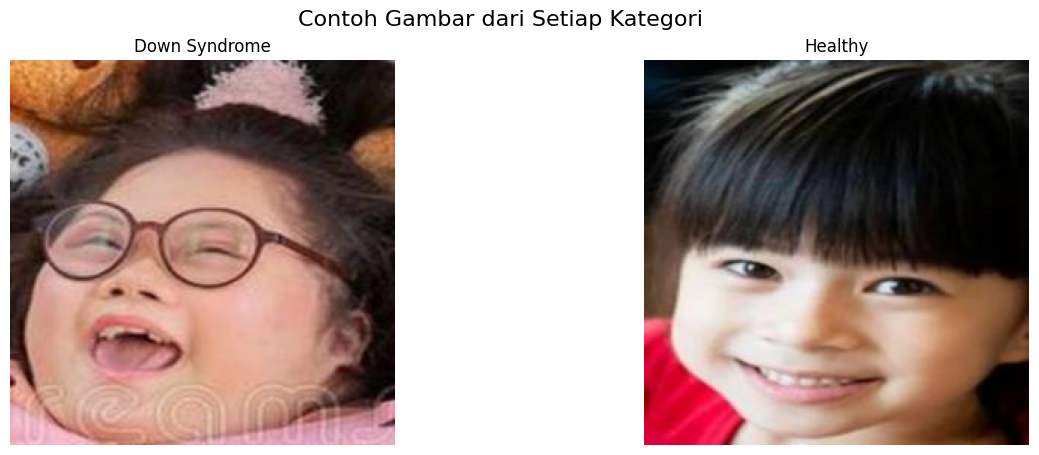

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Menghitung jumlah gambar di setiap kategori
category_counts = {}
for category in categories:
    category_dir = os.path.join(DATASET_DIR, category)
    if os.path.isdir(category_dir):
        count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = count

# 1. Visualisasi Distribusi Jumlah Gambar per Kategori
plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'orange'])
plt.title('Distribusi Jumlah Gambar per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)
plt.show()

# 2. Menampilkan Contoh Gambar dari Setiap Kategori
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    category_dir = os.path.join(DATASET_DIR, category)
    example_images = random.sample(os.listdir(category_dir), 3)
    axs[i].set_title(category)
    axs[i].imshow(mpimg.imread(os.path.join(category_dir, example_images[0])))
    axs[i].axis('off')

plt.suptitle('Contoh Gambar dari Setiap Kategori', fontsize=16)
plt.show()

In [ ]:
# import os
# import random
# from shutil import copy

# # Fungsi untuk split data
# def split_data(dataset_dir, output_dir, train_ratio=0.8, valid_ratio=0.1):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     train_dir = os.path.join(output_dir, 'train')
#     valid_dir = os.path.join(output_dir, 'validation')
#     test_dir = os.path.join(output_dir, 'test')

#     if not os.path.exists(train_dir): os.makedirs(train_dir)
#     if not os.path.exists(valid_dir): os.makedirs(valid_dir)
#     if not os.path.exists(test_dir): os.makedirs(test_dir)

#     categories = ['Down Syndrome', 'Healthy']
#     for category in categories:
#         category_path = os.path.join(dataset_dir, category)
#         images = [
#             os.path.join(category_path, img)
#             for img in os.listdir(category_path)
#             if img.lower().endswith(('.jpg', '.png', '.jpeg'))
#         ]

#         print(f"Jumlah gambar '{category}' sebelum pembagian: {len(images)}")
#         random.shuffle(images)

#         train_split = int(train_ratio * len(images))
#         valid_split = int((train_ratio + valid_ratio) * len(images))

#         for i, img_path in enumerate(images):
#             if i < train_split:
#                 target_dir = os.path.join(train_dir, category)
#             elif i < valid_split:
#                 target_dir = os.path.join(valid_dir, category)
#             else:
#                 target_dir = os.path.join(test_dir, category)

#             if not os.path.exists(target_dir):
#                 os.makedirs(target_dir)

#             copy(img_path, target_dir)

#         print(f"Jumlah gambar '{category}' setelah pembagian:")
#         print(f"  Train: {len(os.listdir(os.path.join(train_dir, category)))}")
#         print(f"  Validation: {len(os.listdir(os.path.join(valid_dir, category)))}")
#         print(f"  Test: {len(os.listdir(os.path.join(test_dir, category)))}")

#     print("\nSplitting selesai.")
#     return train_dir, valid_dir, test_dir

# # Fungsi untuk mengecek jumlah file dalam subfolder
# def count_files_in_subfolders(directory):
#     counts = {}
#     for folder in os.listdir(directory):
#         folder_path = os.path.join(directory, folder)
#         if os.path.isdir(folder_path):
#             counts[folder] = len([f for f in os.scandir(folder_path) if f.is_file()])
#     return counts

# # Path input dan output dataset
# OUTPUT_DIR = '/content/drive/MyDrive/DATASET/ASIA/splitted_data'

# # Proses splitting
# train_dir, valid_dir, test_dir = split_data(DATASET_DIR, OUTPUT_DIR)

Jumlah gambar 'Down Syndrome' sebelum pembagian: 362
Jumlah gambar 'Down Syndrome' setelah pembagian:
  Train: 289
  Validation: 36
  Test: 37
Jumlah gambar 'Healthy' sebelum pembagian: 504
Jumlah gambar 'Healthy' setelah pembagian:
  Train: 403
  Validation: 50
  Test: 51

Splitting selesai.


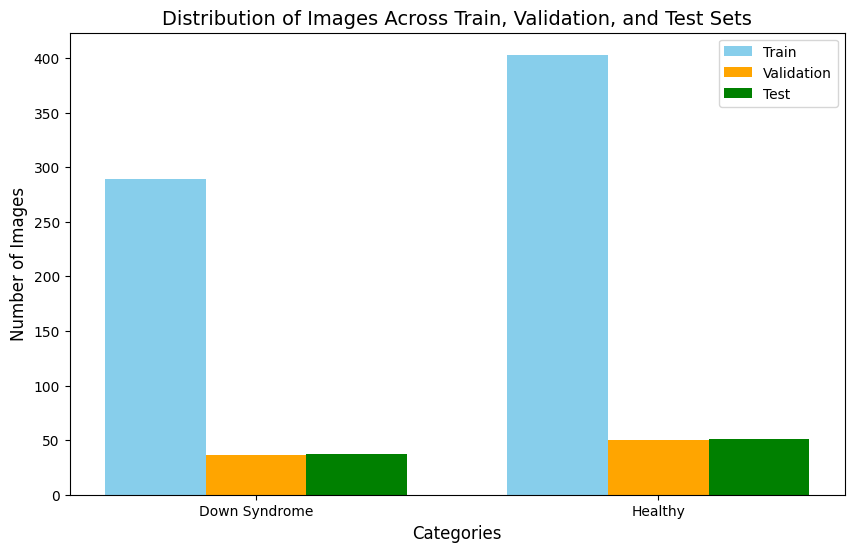

Contoh gambar dari folder Train:


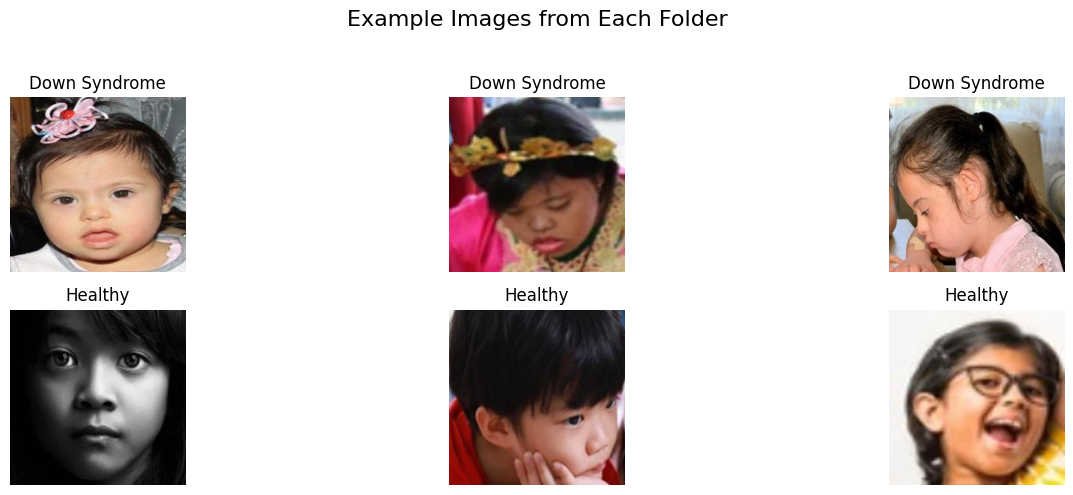

Contoh gambar dari folder Validation:


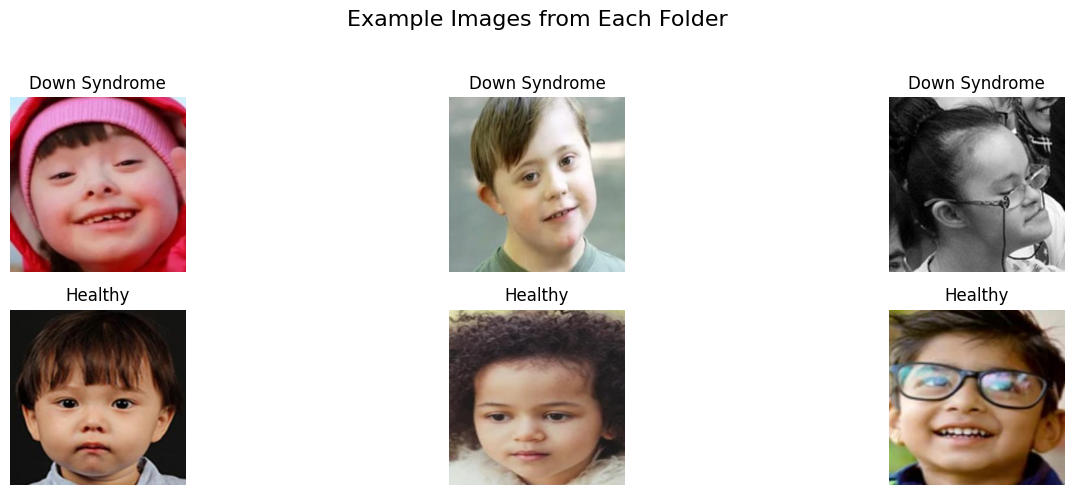

Contoh gambar dari folder Test:


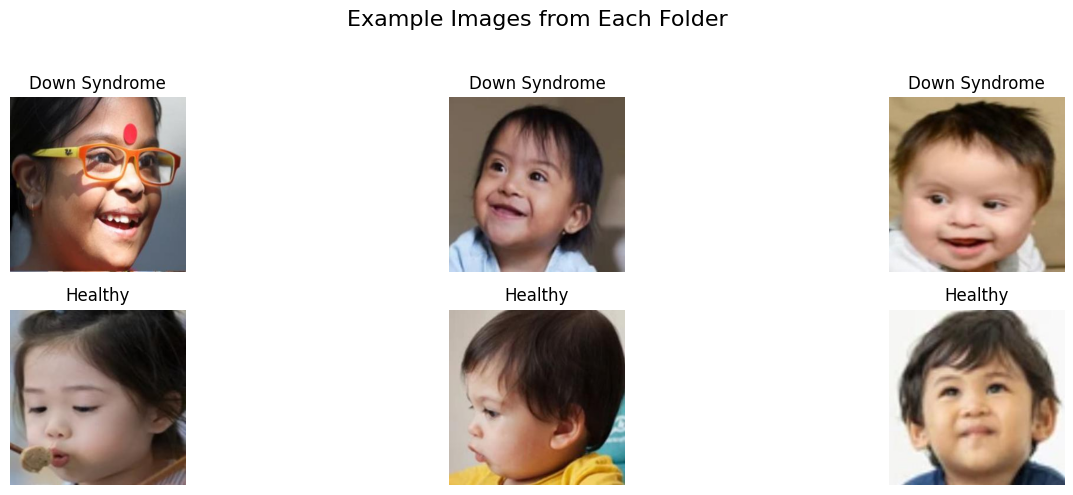

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# import random

# # Fungsi untuk menghitung jumlah gambar di setiap folder
# def count_images_by_category(folder_dir, categories):
#     counts = {}
#     for category in categories:
#         category_path = os.path.join(folder_dir, category)
#         if os.path.exists(category_path):
#             counts[category] = len([img for img in os.listdir(category_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))])
#         else:
#             counts[category] = 0
#     return counts

# # Visualisasi Distribusi Dataset
# def visualize_distribution(train_dir, valid_dir, test_dir, categories):
#     train_counts = count_images_by_category(train_dir, categories)
#     valid_counts = count_images_by_category(valid_dir, categories)
#     test_counts = count_images_by_category(test_dir, categories)

#     data = {
#         "Train": list(train_counts.values()),
#         "Validation": list(valid_counts.values()),
#         "Test": list(test_counts.values()),
#     }

#     # Bar plot
#     x = categories
#     bar_width = 0.25
#     positions = [i for i, _ in enumerate(x)]

#     plt.figure(figsize=(10, 6))
#     plt.bar(positions, data["Train"], color='skyblue', width=bar_width, label='Train')
#     plt.bar([p + bar_width for p in positions], data["Validation"], color='orange', width=bar_width, label='Validation')
#     plt.bar([p + bar_width * 2 for p in positions], data["Test"], color='green', width=bar_width, label='Test')

#     plt.xlabel("Categories", fontsize=12)
#     plt.ylabel("Number of Images", fontsize=12)
#     plt.title("Distribution of Images Across Train, Validation, and Test Sets", fontsize=14)
#     plt.xticks([p + bar_width for p in positions], x)
#     plt.legend()
#     plt.show()

# # Visualisasi Contoh Gambar
# def visualize_samples(base_dir, categories, num_samples=2):
#     fig, axs = plt.subplots(len(categories), num_samples, figsize=(15, 5))
#     fig.suptitle("Example Images from Each Folder", fontsize=16)

#     for i, category in enumerate(categories):
#         category_path = os.path.join(base_dir, category)
#         if os.path.exists(category_path):
#             samples = random.sample(os.listdir(category_path), min(num_samples, len(os.listdir(category_path))))
#             for j, sample in enumerate(samples):
#                 img_path = os.path.join(category_path, sample)
#                 axs[i, j].imshow(mpimg.imread(img_path))
#                 axs[i, j].set_title(f"{category}")
#                 axs[i, j].axis('off')

#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()

# # Path setelah splitting
# train_dir = '/content/drive/MyDrive/DATASET/ASIA/splitted_data/train'
# valid_dir = '/content/drive/MyDrive/DATASET/ASIA/splitted_data/validation'
# test_dir = '/content/drive/MyDrive/DATASET/ASIA/splitted_data/test'

# # Kategori
# categories = ['Down Syndrome', 'Healthy']

# # Visualisasi Distribusi
# visualize_distribution(train_dir, valid_dir, test_dir, categories)

# # Visualisasi Contoh Gambar dari Train
# print("Contoh gambar dari folder Train:")
# visualize_samples(train_dir, categories, num_samples=3)

# # Visualisasi Contoh Gambar dari Validation
# print("Contoh gambar dari folder Validation:")
# visualize_samples(valid_dir, categories, num_samples=3)

# # Visualisasi Contoh Gambar dari Test
# print("Contoh gambar dari folder Test:")
# visualize_samples(test_dir, categories, num_samples=3)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os
# from PIL import Image
# import numpy as np

# # Direktori dataset asli dan direktori penyimpanan augmentasi
# original_dataset_dir = '/content/drive/MyDrive/DATASET/ASIA/splitted_data/train'
# augmented_dataset_dir = '/content/drive/MyDrive/DATASET/ASIA/augmented_data'

# # Buat direktori untuk menyimpan gambar augmentasi jika belum ada
# os.makedirs(augmented_dataset_dir, exist_ok=True)

# # Konfigurasi augmentasi
# datagen = ImageDataGenerator(
#     rotation_range=20,       # Rotasi gambar secara acak hingga 20 derajat
#     width_shift_range=0.1,   # Geser gambar secara horizontal hingga 20%
#     height_shift_range=0.1,  # Geser gambar secara vertikal hingga 20%
#     shear_range=0.10,        # Shear transformation
#     zoom_range=0.10,         # Zoom gambar secara acak hingga 10%
#     horizontal_flip=True,    # Membalik gambar secara horizontal
#     fill_mode='nearest'      # Metode pengisian ulang piksel kosong
# )

# def save_augmented_images(image_path, save_dir, num_augmented_images=3):
#     # Muat gambar asli
#     img = Image.open(image_path)

#     # Jika gambar memiliki mode yang bukan RGB, konversi ke RGB
#     if img.mode != 'RGB':
#         img = img.convert('RGB')

#     # Konversi gambar ke array
#     img_array = np.array(img)
#     if img_array.ndim == 3:
#         img_array = np.expand_dims(img_array, axis=0)

#     # Generator gambar augmentasi
#     aug_iter = datagen.flow(img_array, batch_size=1)

#     # Buat beberapa gambar augmentasi dan simpan
#     for i in range(num_augmented_images):
#         aug_img = next(aug_iter)[0].astype(np.uint8)  # Ambil gambar augmentasi
#         aug_img = Image.fromarray(aug_img)  # Konversi ke format gambar

#         # Menyimpan gambar augmentasi
#         base_name = os.path.basename(image_path).split('.')[0]
#         aug_img.save(os.path.join(save_dir, f"{base_name}_aug_{i+1}.jpg"))

# # Proses setiap gambar dalam dataset asli
# for category in os.listdir(original_dataset_dir):
#     category_path = os.path.join(original_dataset_dir, category)

#     # Pastikan hanya direktori yang diproses
#     if os.path.isdir(category_path):
#         save_category_path = os.path.join(augmented_dataset_dir, category)
#         os.makedirs(save_category_path, exist_ok=True)

#         for image_file in os.listdir(category_path):
#             image_path = os.path.join(category_path, image_file)

#             # Memastikan hanya memproses file gambar
#             if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 save_augmented_images(image_path, save_category_path, num_augmented_images=5)

In [ ]:
import os
import shutil
import random

# Path asal dan tujuan
data_dir = "/content/drive/MyDrive/DATASET/ASIA"
test_dir = os.path.join(data_dir, "test_data")

# Bikin folder test_data jika belum ada
os.makedirs(test_dir, exist_ok=True)

# Loop tiap kategori (Down Syndrome & Healthy)
for category in ["Down Syndrome", "Healthy"]:
    category_path = os.path.join(data_dir, category)
    test_category_path = os.path.join(test_dir, category)

    # Bikin folder test_data untuk kategori ini
    os.makedirs(test_category_path, exist_ok=True)

    # Ambil semua gambar
    images = [img for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    test_size = int(len(images) * 0.1)  # 10% buat test

    # Pilih gambar secara random untuk test
    test_images = random.sample(images, test_size)

    # Pindahin gambar ke test_data
    for img in test_images:
        shutil.move(os.path.join(category_path, img), os.path.join(test_category_path, img))

print("✅ Test data berhasil dipindahkan!")

✅ Test data berhasil dipindahkan!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Path dataset asli & tujuan penyimpanan
original_data_dir = '/content/drive/MyDrive/DATASET/ASIA'
augmented_data_dir = '/content/drive/MyDrive/DATASET_AUGMENTED'

# Pastikan folder baru ada
os.makedirs(augmented_data_dir, exist_ok=True)

# Augmentasi keras
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hitung jumlah gambar tiap kelas
category_counts = {}
for category in ['Down Syndrome', 'Healthy']:
    category_path = os.path.join(original_data_dir, category)
    category_counts[category] = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png'))])

# Tentukan kelas minoritas yang perlu augmentasi
max_count = max(category_counts.values())
for category, count in category_counts.items():
    input_path = os.path.join(original_data_dir, category)
    output_path = os.path.join(augmented_data_dir, category)
    os.makedirs(output_path, exist_ok=True)

    # Copy semua gambar asli ke folder baru
    image_files = [f for f in os.listdir(input_path) if f.endswith(('.jpg', '.png'))]
    for img_file in tqdm(image_files, desc=f"Copying {category}"):
        img_path = os.path.join(input_path, img_file)
        img = cv2.imread(img_path)
        cv2.imwrite(os.path.join(output_path, img_file), img)

    # Augmentasi hanya untuk kelas minoritas
    if count < max_count:
        print(f"🔹 Augmenting {category} to match {max_count} images...")
        extra_needed = max_count - count  # Berapa banyak gambar tambahan yang dibutuhkan

        i = 0
        while i < extra_needed:
            img_file = image_files[i % len(image_files)]  # Loop ulang jika habis
            img_path = os.path.join(input_path, img_file)

            # Baca gambar
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert ke RGB
            image = np.expand_dims(image, axis=0)  # Ubah ke format batch

            # Augmentasi 1 gambar per iterasi
            for batch in datagen.flow(image, batch_size=1):
                aug_img = batch[0].astype(np.uint8)
                aug_img_path = os.path.join(output_path, f"aug_{i}_{img_file}")
                cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

                i += 1
                if i >= extra_needed:
                    break  # Stop kalau sudah cukup

print("✅ Augmentasi selesai! Dataset sekarang seimbang.")

Copying Healthy: 100%|██████████| 558/558 [00:14<00:00, 37.64it/s]


🔹 Augmenting Healthy to match 678 images...
✅ Augmentasi selesai! Dataset sekarang seimbang.


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
import pandas as pd
import numpy as np
import os

# Path ke dataset baru (setelah augmentasi)
data_dir = '/content/drive/MyDrive/DATASET_AUGMENTED'
test_dir = '/content/drive/MyDrive/DATASET/test_data'  # Test set tetap dipisah

# Ambil daftar gambar dan labelnya
image_paths = []
labels = []
categories = ['Down Syndrome', 'Healthy']

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
    image_paths.extend(images)
    labels.extend([label] * len(images))

# Buat DataFrame
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# Ubah label ke string agar cocok dengan class_mode='categorical'
df['label'] = df['label'].astype(str)

# Set up k-fold cross-validation (5 fold)
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# ImageDataGenerator untuk training (dengan augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator untuk validation & test (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Test data tetap konstan
test_generator = val_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# Menyimpan hasil setiap fold
fold_accuracies = []
fold_losses = []
fold_histories = []

# Start k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kfolds.split(df)):
    print(f"\nTraining on fold {fold + 1}...")

    # Buat subset train & val dari DataFrame df
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    # Training generator (pakai augmentasi)
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=True  # ✅ Agar data diacak di tiap epoch
    )

    # Validation generator (tanpa augmentasi)
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='label',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32,
        shuffle=False  # ✅ Agar evaluasi tetap konsisten
    )

    # Model VGG19
    model = Sequential()
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers[:-5]:
        layer.trainable = False
    model.add(base_model)

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_vgg19_fold_{fold + 1}.keras', monitor='val_accuracy', save_best_only=True)

    history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stopping, model_checkpoint])

    fold_accuracies.append(max(history.history['val_accuracy']))
    fold_losses.append(min(history.history['val_loss']))
    fold_histories.append(history)

    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test accuracy for fold {fold + 1}: {test_acc}")

# Output fold accuracies dan mean accuracy
print("\n=== Hasil K-Fold Cross-Validation ===")
for i, (acc, loss) in enumerate(zip(fold_accuracies, fold_losses)):
    print(f"Fold {i+1}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

# Rata-rata akurasi & loss
print(f"\nMean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f}")

Found 136 images belonging to 2 classes.

Training on fold 1...
Found 1084 validated image filenames belonging to 2 classes.
Found 272 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 718ms/step - accuracy: 0.5168 - loss: 0.7864 - val_accuracy: 0.5662 - val_loss: 0.6868
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.5461 - loss: 0.6833 - val_accuracy: 0.5478 - val_loss: 0.6656
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 639ms/step - accuracy: 0.6031 - loss: 0.6685 - val_accuracy: 0.7610 - val_loss: 0.5425
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step - accuracy: 0.7432 - loss: 0.5463 - val_accuracy: 0.7279 - val_loss: 0.5926
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 614ms/step - accuracy: 0.7282 - loss: 0.6103 - val_accuracy: 0.8235 - val_loss: 0.3923
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 585ms/step - accuracy: 0.7780 - loss: 0.4662 - val_accuracy: 0.7463 - val_loss: 0.5484
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.8279 - loss: 0.4003 - val_accuracy: 0.8235 - val_loss: 0.3373
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 630ms/step - accuracy: 0.8705 - loss: 0.3227 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 712ms/step - accuracy: 0.5493 - loss: 0.8145 - val_accuracy: 0.6753 - val_loss: 0.6319
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 644ms/step - accuracy: 0.6289 - loss: 0.6256 - val_accuracy: 0.7823 - val_loss: 0.4770
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 619ms/step - accuracy: 0.6994 - loss: 0.5770 - val_accuracy: 0.8339 - val_loss: 0.3900
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - accuracy: 0.7855 - loss: 0.4583 - val_accuracy: 0.8081 - val_loss: 0.4303
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 0.8236 - loss: 0.3931 - val_accuracy: 0.8376 - val_loss: 0.3526
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 583ms/step - accuracy: 0.8290 - loss: 0.3818 - val_accuracy: 0.7565 - val_loss: 0.4946
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 607ms/step - accuracy: 0.8110 - loss: 0.4741 - val_accuracy: 0.8339 - val_loss: 0.3715
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 604ms/step - accuracy: 0.8681 - loss: 0.3235 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 715ms/step - accuracy: 0.5267 - loss: 0.7727 - val_accuracy: 0.7011 - val_loss: 0.6387
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 613ms/step - accuracy: 0.6329 - loss: 0.6424 - val_accuracy: 0.7638 - val_loss: 0.5146
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 613ms/step - accuracy: 0.7179 - loss: 0.5752 - val_accuracy: 0.7897 - val_loss: 0.4512
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 627ms/step - accuracy: 0.7627 - loss: 0.4995 - val_accuracy: 0.8339 - val_loss: 0.3725
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 620ms/step - accuracy: 0.8062 - loss: 0.4377 - val_accuracy: 0.7565 - val_loss: 0.4946
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 605ms/step - accuracy: 0.8234 - loss: 0.4096 - val_accuracy: 0.7491 - val_loss: 0.4603
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 578ms/step - accuracy: 0.8069 - loss: 0.3984 - val_accuracy: 0.7306 - val_loss: 0.4964
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.8406 - loss: 0.3759
Test accuracy for fold 3

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 69s 747ms/step - accuracy: 0.5089 - loss: 0.8658 - val_accuracy: 0.6421 - val_loss: 0.6439
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 0.5989 - loss: 0.6647 - val_accuracy: 0.7269 - val_loss: 0.5328
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 619ms/step - accuracy: 0.6584 - loss: 0.6219 - val_accuracy: 0.8413 - val_loss: 0.3993
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 603ms/step - accuracy: 0.7358 - loss: 0.5390 - val_accuracy: 0.8376 - val_loss: 0.3540
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 619ms/step - accuracy: 0.8026 - loss: 0.4370 - val_accuracy: 0.8856 - val_loss: 0.2913
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 612ms/step - accuracy: 0.7998 - loss: 0.4546 - val_accuracy: 0.9041 - val_loss: 0.2580
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 602ms/step - accuracy: 0.8515 - loss: 0.3538 - val_accuracy: 0.8782 - val_loss: 0.3341
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 597ms/step - accuracy: 0.8719 - loss: 0.3384 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 773ms/step - accuracy: 0.5287 - loss: 0.8033 - val_accuracy: 0.7048 - val_loss: 0.5880
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 613ms/step - accuracy: 0.6509 - loss: 0.6449 - val_accuracy: 0.7417 - val_loss: 0.5687
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 637ms/step - accuracy: 0.6935 - loss: 0.5623 - val_accuracy: 0.7970 - val_loss: 0.4694
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 611ms/step - accuracy: 0.7772 - loss: 0.4912 - val_accuracy: 0.8339 - val_loss: 0.3849
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 625ms/step - accuracy: 0.8028 - loss: 0.4425 - val_accuracy: 0.8376 - val_loss: 0.3420
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - accuracy: 0.8486 - loss: 0.4004 - val_accuracy: 0.7934 - val_loss: 0.4249
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 587ms/step - accuracy: 0.8449 - loss: 0.3659 - val_accuracy: 0.8007 - val_loss: 0.4219
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 609ms/step - accuracy: 0.8394 - loss: 0.3723 - val_accu

Fold terbaik adalah Fold 4 dengan akurasi 0.9151


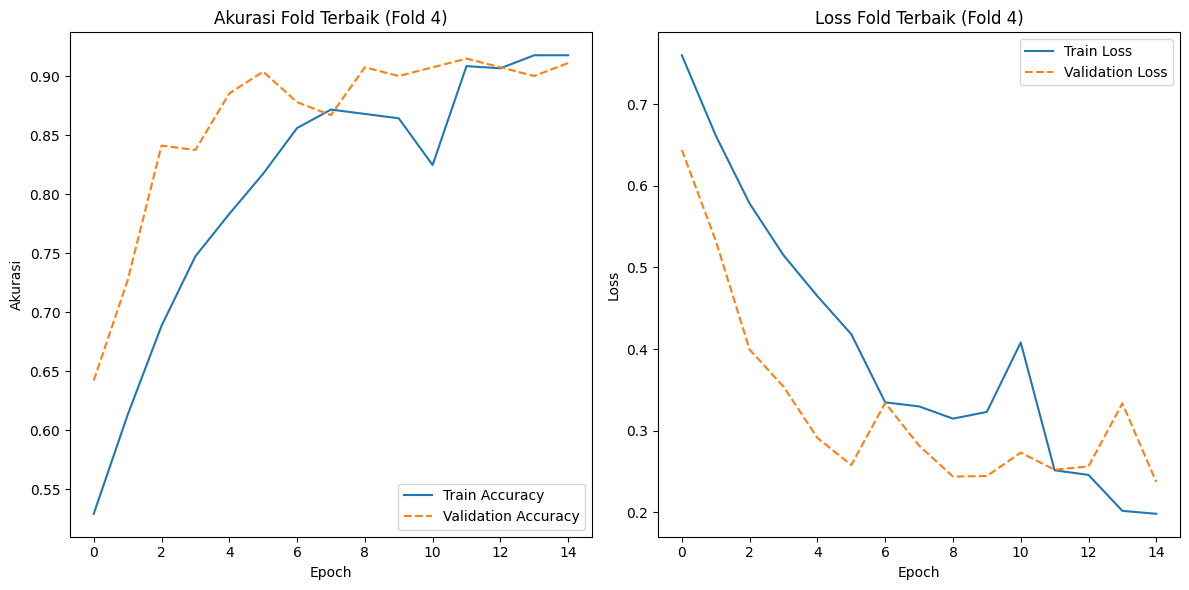

Akurasi terbaik pada fold 4: 0.9151
Loss terbaik pada fold 4: 0.2374


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Ambil history fold terbaik
best_history = fold_histories[best_fold_index]

# Grafik Akurasi untuk fold terbaik
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title(f'Akurasi Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss untuk fold terbaik
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title(f'Loss Fold Terbaik (Fold {best_fold_index + 1})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Tampilkan akurasi dan loss untuk fold terbaik
print(f"Akurasi terbaik pada fold {best_fold_index + 1}: {fold_accuracies[best_fold_index]:.4f}")
print(f"Loss terbaik pada fold {best_fold_index + 1}: {fold_losses[best_fold_index]:.4f}")

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg19_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (Gunakan ImageDataGenerator baru, tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Harus 'categorical' karena model pakai softmax
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Class labels untuk laporan
class_labels = list(test_generator.class_indices.keys())

# Generate classification report untuk fold terbaik
report = classification_report(y_true, y_pred, target_names=class_labels)

# Tampilkan laporan
print("Classification Report for Best Fold:")
print(report)

# (Optional) Simpan laporan ke file
# with open(f'classification_report_fold_{best_fold_index + 1}.txt', 'w') as f:
#     f.write(report)

Fold terbaik adalah Fold 4 dengan akurasi 0.9151
Found 136 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step
Classification Report for Best Fold:
               precision    recall  f1-score   support

Down Syndrome       0.92      0.96      0.94        75
      Healthy       0.95      0.90      0.92        61

     accuracy                           0.93       136
    macro avg       0.94      0.93      0.93       136
 weighted avg       0.93      0.93      0.93       136



Fold terbaik adalah Fold 4 dengan akurasi 0.9151
Found 136 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step


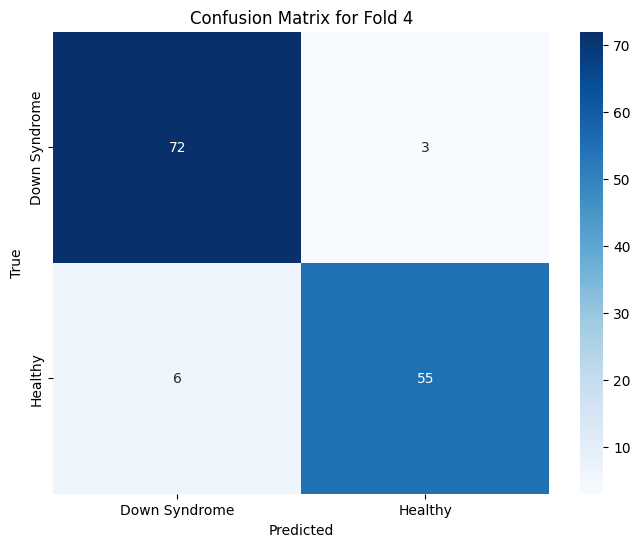

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pilih fold terbaik berdasarkan validasi akurasi maksimum
best_fold_index = np.argmax(fold_accuracies)  # Index fold terbaik
print(f"Fold terbaik adalah Fold {best_fold_index + 1} dengan akurasi {fold_accuracies[best_fold_index]:.4f}")

# Load model terbaik dari fold terbaik
best_model_path = f'best_vgg19_fold_{best_fold_index + 1}.keras'
best_model = tf.keras.models.load_model(best_model_path)

# Test generator untuk fold terbaik (tanpa validation_split)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',  # Sesuai dengan softmax output
    batch_size=32,
    shuffle=False  # Jangan di-shuffle supaya urutan gambar tetap
)

# Dapatkan prediksi untuk fold terbaik
predictions = best_model.predict(test_generator)

# Konversi hasil softmax menjadi label kelas
y_pred = np.argmax(predictions, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Ambil label asli (y_true) dari generator
y_true = test_generator.classes  # Label asli dari test set

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title(f"Confusion Matrix for Fold {best_fold_index + 1}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Jumlah DS diprediksi sebagai Healthy: 3
Jumlah Healthy diprediksi sebagai DS: 6


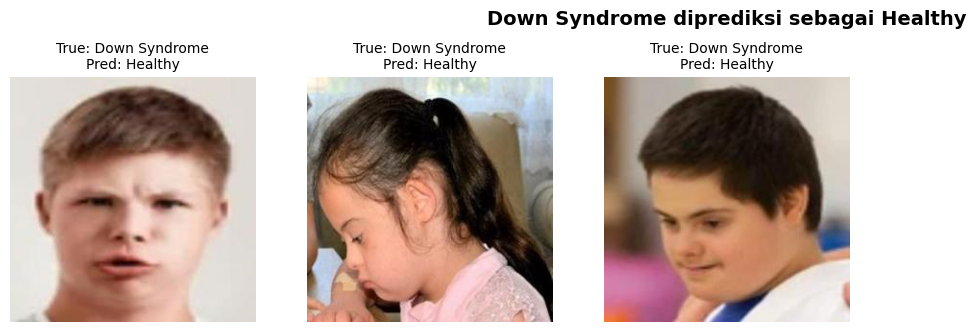

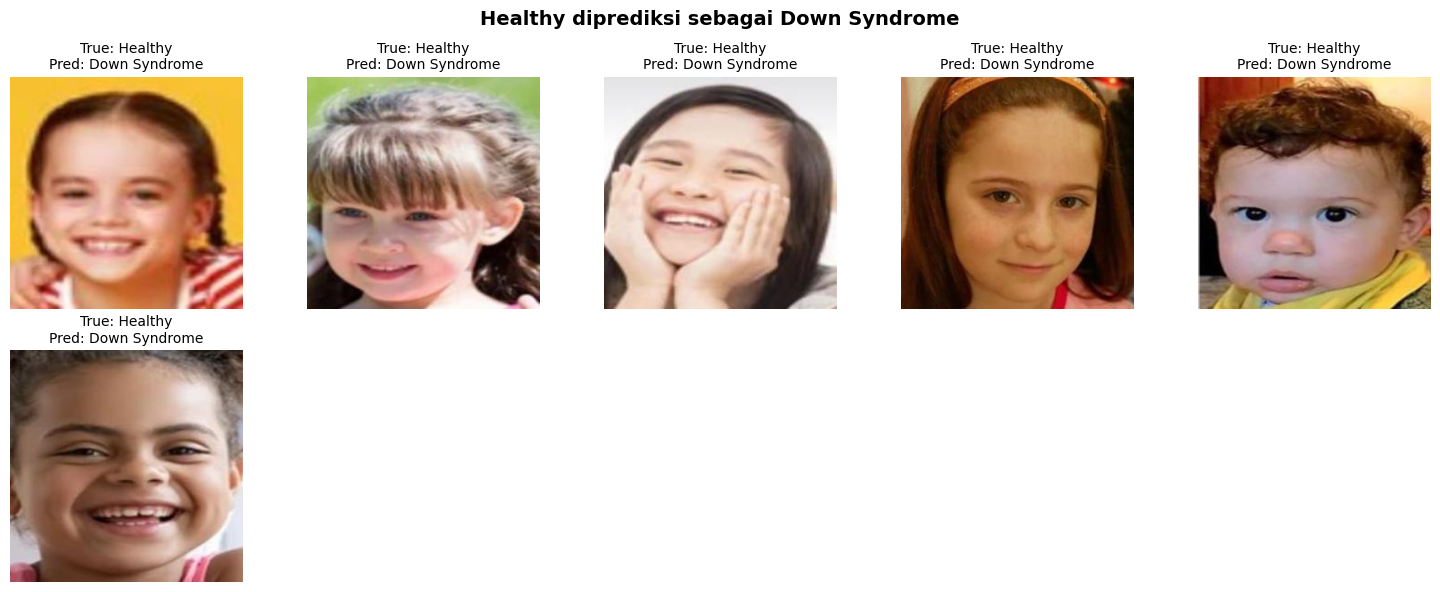

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ambil daftar label kelas dari test generator
class_labels = list(test_generator.class_indices.keys())

# Indeks kesalahan prediksi
misclassified_indices = np.where(y_pred != y_true)[0]

# Filter berdasarkan jenis kesalahan
ds_as_healthy = [idx for idx in misclassified_indices if y_true[idx] == 0 and y_pred[idx] == 1]  # DS → Healthy
healthy_as_ds = [idx for idx in misclassified_indices if y_true[idx] == 1 and y_pred[idx] == 0]  # Healthy → DS

print(f"Jumlah DS diprediksi sebagai Healthy: {len(ds_as_healthy)}")
print(f"Jumlah Healthy diprediksi sebagai DS: {len(healthy_as_ds)}")

# Fungsi untuk menampilkan gambar
def plot_misclassified_images(indices, title, rows=2, cols=5):
    plt.figure(figsize=(cols * 3, rows * 3))
    for i, idx in enumerate(indices[:rows * cols]):  # Batasi agar grid tidak terlalu besar
        img_path = test_generator.filepaths[idx]
        img = Image.open(img_path)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        true_label = class_labels[y_true[idx]]
        pred_label = class_labels[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
        plt.axis('off')

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Tampilkan kesalahan prediksi DS → Healthy
if ds_as_healthy:
    plot_misclassified_images(ds_as_healthy, "Down Syndrome diprediksi sebagai Healthy")

# Tampilkan kesalahan prediksi Healthy → DS
if healthy_as_ds:
    plot_misclassified_images(healthy_as_ds, "Healthy diprediksi sebagai Down Syndrome")

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,562,184 (185.25 MB)

 Trainable params: 12,659,010 (48.29 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

 Optimizer params: 25,318,022 (96.58 MB)